# 11.1 日期和时间数据类型及工具

In [1]:
from datetime import datetime
now=datetime.now()
now

datetime.datetime(2018, 6, 8, 10, 15, 40, 553161)

In [2]:
now.year,now.month,now.day

(2018, 6, 8)

datetime以毫秒形式存储日期和时间。timedelta表示两个datetime对象之间的时间差：

In [3]:
delta=datetime(2018,6,6)-datetime(2018,5,6,10,30)
delta

datetime.timedelta(30, 48600)

In [4]:
delta.days

30

In [5]:
delta.seconds

48600

可以给datetime对象加上（或减去）一个或多个timedelta，这样会产生一个新对象：

In [6]:
from datetime import timedelta
start=datetime(2018,6,6)
start-timedelta(10)

datetime.datetime(2018, 5, 27, 0, 0)

In [7]:
start+timedelta(10)*2

datetime.datetime(2018, 6, 26, 0, 0)

## 字符串和datetime的相互转换
利用str或strftime方法（传入一个格式化字符串），datetime对象可以被格式化为字符串：

In [8]:
stime=datetime(2018,6,6)
str(stime)

'2018-06-06 00:00:00'

In [9]:
stime.strftime('%Y-%m-%d')

'2018-06-06'

In [10]:
value='2018-06-06'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2018, 6, 6, 0, 0)

In [11]:
datelst=['2018/3/15','2018/5/5']
[datetime.strptime(x,'%Y/%m/%d') for x in datelst]

[datetime.datetime(2018, 3, 15, 0, 0), datetime.datetime(2018, 5, 5, 0, 0)]

datetime.strptime是通过已知格式进行日期解析的最佳方式。但是每次都要编写格式定义是很麻烦的事情，尤其是对于一些常见的日期格式。这种情况下，你可以用dateutil这个第三方包中的parser.parse方法（pandas中已经自动安装好了）：

In [12]:
from dateutil.parser import parse
parse('2018-06-06')

datetime.datetime(2018, 6, 6, 0, 0)

In [13]:
parse('2018/06/06')

datetime.datetime(2018, 6, 6, 0, 0)

在国际通用的格式中，日出现在月的前面很普遍，传入dayfirst=True即可解决这个问题：

In [14]:
parse('6/6/2018',dayfirst=True)

datetime.datetime(2018, 6, 6, 0, 0)

pandas通常是用于处理成组日期的，不管这些日期是DataFrame的轴索引还是列。to_datetime方法可以解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快：

In [15]:
import pandas as pd
datelst=['2018-06-06 17:52:00','2018-01-20 12:00:00']
pd.to_datetime(datelst)

DatetimeIndex(['2018-06-06 17:52:00', '2018-01-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
dx=pd.to_datetime(datelst+[None])
dx

DatetimeIndex(['2018-06-06 17:52:00', '2018-01-20 12:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
dx[2]

NaT

In [18]:
pd.isnull(dx)

array([False, False,  True])

In [19]:
pd.isna(dx)

array([False, False,  True])

# 11.2 时间序列基础
pandas最基本的时间序列类型就是以时间戳（通常以Python字符串或datatime对象表示）为索引的Series：

In [21]:
import numpy as np
dates=[datetime(2018,1,20),datetime(2017,3,4),datetime(2018,2,3),datetime(2016,8,7),datetime(2016,5,4),datetime(2018,10,9)]
ds=pd.Series(np.random.randn(6),index=dates)
ds

2018-01-20   -0.132732
2017-03-04    1.334740
2018-02-03    0.004811
2016-08-07   -0.573585
2016-05-04   -0.530651
2018-10-09   -0.883905
dtype: float64

In [22]:
ds.index

DatetimeIndex(['2018-01-20', '2017-03-04', '2018-02-03', '2016-08-07',
               '2016-05-04', '2018-10-09'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ds=ds.sort_index()
ds

2016-05-04   -0.530651
2016-08-07   -0.573585
2017-03-04    1.334740
2018-01-20   -0.132732
2018-02-03    0.004811
2018-10-09   -0.883905
dtype: float64

跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐：

In [24]:
ds+ds[::2]

2016-05-04   -1.061302
2016-08-07         NaN
2017-03-04    2.669479
2018-01-20         NaN
2018-02-03    0.009623
2018-10-09         NaN
dtype: float64

pandas用NumPy的datetime64数据类型以纳秒形式存储时间戳：

In [25]:
ds.index.dtype

dtype('<M8[ns]')

DatetimeIndex中的各个标量值是pandas的Timestamp对象：

In [26]:
stamp=ds.index[0]
stamp

Timestamp('2016-05-04 00:00:00')

## 索引、选取、子集构造
当你根据标签索引选取数据时，时间序列和其它的pandas.Series很像：

In [27]:
ds['20160807']

-0.5735846306503481

In [28]:
ds['2016/08/07']

-0.5735846306503481

对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片：

In [29]:
longer_ds=pd.Series(np.random.randn(500),index=pd.date_range('2016-12-22',periods=500))
longer_ds.head()

2016-12-22   -1.065997
2016-12-23    2.062893
2016-12-24    0.895812
2016-12-25    0.138700
2016-12-26   -0.218027
Freq: D, dtype: float64

In [30]:
longer_ds['2018'].head()

2018-01-01    1.257545
2018-01-02    1.254113
2018-01-03    0.212343
2018-01-04    1.387202
2018-01-05    0.416939
Freq: D, dtype: float64

这里，字符串“2001”被解释成年，并根据它选取时间区间。指定月也同样奏效：

In [31]:
longer_ds['2018-05']

2018-05-01   -1.623078
2018-05-02   -0.688763
2018-05-03   -0.313650
2018-05-04    0.635042
2018-05-05    1.162482
Freq: D, dtype: float64

datetime对象也可以进行切片：

In [32]:
ds

2016-05-04   -0.530651
2016-08-07   -0.573585
2017-03-04    1.334740
2018-01-20   -0.132732
2018-02-03    0.004811
2018-10-09   -0.883905
dtype: float64

In [33]:
ds['2017-01-01':'2018-10-01']

2017-03-04    1.334740
2018-01-20   -0.132732
2018-02-03    0.004811
dtype: float64

此外，还有一个等价的实例方法也可以截取两个日期之间TimeSeries：

In [34]:
ds.truncate(after='2017-01-01')

2016-05-04   -0.530651
2016-08-07   -0.573585
dtype: float64

上面这些操作对DataFrame也有效。例如，对DataFrame的行进行索引：

In [35]:
dates=pd.date_range('2017-05-01',periods=100)
df=pd.DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado','Texas','New York','Ohio'])
df.head()

,Colorado,Texas,New York,Ohio
2017-05-01,2.178929,1.683094,-0.610260,-0.472670
2017-05-02,-1.377042,1.190471,-0.534015,2.444546
2017-05-03,0.678749,-0.489705,0.142991,-2.456580
2017-05-04,0.374132,0.225991,0.430966,0.175455
2017-05-05,0.990087,0.298349,-0.425525,2.176995


In [36]:
df['2017-08']

,Colorado,Texas,New York,Ohio
2017-08-01,2.053008,-0.809034,1.706821,1.547991
2017-08-02,0.503843,1.253176,1.267932,-0.404529
2017-08-03,0.676833,0.188130,0.276715,-0.046647
2017-08-04,-0.807333,-0.270816,-0.311845,0.297191
2017-08-05,-0.516965,-0.183513,0.051241,2.537458
2017-08-06,1.177027,0.356342,-0.883507,0.583684
2017-08-07,1.164540,-0.380865,-0.388924,-0.351307
2017-08-08,0.502531,-0.235800,-0.173041,-0.547787


## 带有重复索引的时间序列
在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况。下面就是一个例子：

In [37]:
dates=pd.DatetimeIndex(['1/1/2018','1/2/2018','1/2/2018','1/3/2018'])
du_ds=pd.Series(range(4),index=dates)
du_ds

2018-01-01    0
2018-01-02    1
2018-01-02    2
2018-01-03    3
dtype: int64

通过检查索引的is_unique属性，我们就可以知道它是不是唯一的：

In [38]:
du_ds.index.is_unique

False

对这个时间序列进行索引，要么产生标量值，要么产生切片，具体要看所选的时间点是否重复：

In [39]:
du_ds['2018-01-01']

0

In [40]:
du_ds['2018-01-02']

2018-01-02    1
2018-01-02    2
dtype: int64

假设你想要对具有非唯一时间戳的数据进行聚合。一个办法是使用groupby，并传入level=0：

In [41]:
grouped=du_ds.groupby(level=0)
grouped.mean()

2018-01-01    0.0
2018-01-02    1.5
2018-01-03    3.0
dtype: float64

In [42]:
grouped.count()

2018-01-01    1
2018-01-02    2
2018-01-03    1
dtype: int64

# 11.3 日期的范围、频率以及移动
## 生成日期范围
pandas.date_range可用于根据指定的频率生成指定长度的DatetimeIndex：

In [43]:
index=pd.date_range('2018-03-01','2018-04-07')
index

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
               '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
               '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
               '2018-03-29', '2018-03-30', '2018-03-31', '2018-04-01',
               '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-07'],
              dtype='datetime64[ns]', freq='D')

默认情况下，date_range会产生按天计算的时间点。如果只传入起始或结束日期，那就还得传入一个表示一段时间的数字：

In [44]:
pd.date_range(start='2018-04-01',periods=10)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range(end='2018-04-01',periods=10)

DatetimeIndex(['2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26',
               '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
               '2018-03-31', '2018-04-01'],
              dtype='datetime64[ns]', freq='D')

起始和结束日期定义了日期索引的严格边界。例如，如果你想要生成一个由每月最后一个工作日组成的日期索引，可以传入"BM"频率（表示business end of month），这样就只会包含时间间隔内（或刚好在边界上的）符合频率要求的日期：

In [46]:
pd.date_range(start='2017-11-01',periods=12,freq='BM')

DatetimeIndex(['2017-11-30', '2017-12-29', '2018-01-31', '2018-02-28',
               '2018-03-30', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31'],
              dtype='datetime64[ns]', freq='BM')

date_range默认会保留起始和结束时间戳的时间信息（如果有的话）：

In [47]:
pd.date_range(start='2018-06-01 12:31:24',periods=5)

DatetimeIndex(['2018-06-01 12:31:24', '2018-06-02 12:31:24',
               '2018-06-03 12:31:24', '2018-06-04 12:31:24',
               '2018-06-05 12:31:24'],
              dtype='datetime64[ns]', freq='D')

有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化（normalize）到午夜的时间戳。normalize选项即可实现该功能：

In [48]:
pd.date_range(start='2018-06-01 12:31:24',periods=5,normalize=True)

DatetimeIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量
pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。例如，按小时计算的频率可以用Hour类表示：

In [49]:
from pandas.tseries.offsets import Hour,Minute
hour=Hour()
hour

<Hour>

传入一个整数即可定义偏移量的倍数：

In [50]:
hour_four=Hour(4)
hour_four

<4 * Hours>

一般来说，无需明确创建这样的对象，只需使用诸如"H"或"4H"这样的字符串别名即可。在基础频率前面放上一个整数即可创建倍数：

In [51]:
pd.date_range(start='2018-03-01',end='2018-03-02',freq='4h')

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 04:00:00',
               '2018-03-01 08:00:00', '2018-03-01 12:00:00',
               '2018-03-01 16:00:00', '2018-03-01 20:00:00',
               '2018-03-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

大部分偏移量对象都可通过加法进行连接：

In [52]:
Hour(2)+Minute(30)

<150 * Minutes>

同理，你也可以传入频率字符串（如"2h30min"），这种字符串可以被高效地解析为等效的表达式：

In [53]:
pd.date_range(start='2018-03-01',periods=10,freq='1h30min')

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 01:30:00',
               '2018-03-01 03:00:00', '2018-03-01 04:30:00',
               '2018-03-01 06:00:00', '2018-03-01 07:30:00',
               '2018-03-01 09:00:00', '2018-03-01 10:30:00',
               '2018-03-01 12:00:00', '2018-03-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

## WOM日期
WOM（Week Of Month）是一种非常实用的频率类，它以WOM开头。它使你能获得诸如“每月第3个星期五”之类的日期：

In [54]:
pd.date_range(start='2018-01-01',end='2018-06-07',freq='WOM-3FRI')

DatetimeIndex(['2018-01-19', '2018-02-16', '2018-03-16', '2018-04-20',
               '2018-05-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 移动（超前和滞后）数据
移动（shifting）指的是沿着时间轴将数据前移或后移。Series和DataFrame都有一个shift方法用于执行单纯的前移或后移操作，保持索引不变：

In [55]:
ds=pd.Series(np.random.randn(4),index=pd.date_range(start='2018-04-01',periods=4))
ds

2018-04-01    0.880247
2018-04-02   -0.952317
2018-04-03    0.003324
2018-04-04   -0.208366
Freq: D, dtype: float64

In [56]:
ds.shift(2)

2018-04-01         NaN
2018-04-02         NaN
2018-04-03    0.880247
2018-04-04   -0.952317
Freq: D, dtype: float64

In [57]:
ds.shift(-2)

2018-04-01    0.003324
2018-04-02   -0.208366
2018-04-03         NaN
2018-04-04         NaN
Freq: D, dtype: float64

shift通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分比变化。可以这样表达：

In [58]:
ds/ds.shift(1)-1

2018-04-01          NaN
2018-04-02    -2.081875
2018-04-03    -1.003491
2018-04-04   -63.683043
Freq: D, dtype: float64

由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。因此，如果频率已知，则可以将其传给shift以便实现对时间戳进行位移而不是对数据进行简单位移：

In [59]:
ds.shift(10,freq='D')#前移一天

2018-04-11    0.880247
2018-04-12   -0.952317
2018-04-13    0.003324
2018-04-14   -0.208366
Freq: D, dtype: float64

In [60]:
ds.shift(5,freq='M')#前移5个月

2018-08-31    0.880247
2018-08-31   -0.952317
2018-08-31    0.003324
2018-08-31   -0.208366
dtype: float64

In [61]:
ds.shift(1,freq='90T')#前移30分钟

2018-04-01 01:30:00    0.880247
2018-04-02 01:30:00   -0.952317
2018-04-03 01:30:00    0.003324
2018-04-04 01:30:00   -0.208366
Freq: D, dtype: float64

## 通过偏移量对日期进行位移
pandas的日期偏移量还可以用在datetime或Timestamp对象上：

In [62]:
from pandas.tseries.offsets import Day,MonthEnd
now=datetime.now()
now

datetime.datetime(2018, 6, 8, 10, 20, 44, 922595)

In [63]:
now+3*Day()

Timestamp('2018-06-11 10:20:44.922595')

In [64]:
now+Day(3)

Timestamp('2018-06-11 10:20:44.922595')

如果加的是锚点偏移量（比如MonthEnd），第一次增量会将原日期向前滚动到符合频率规则的下一个日期：

In [65]:
now+MonthEnd()

Timestamp('2018-06-30 10:20:44.922595')

In [66]:
now+MonthEnd(2)

Timestamp('2018-07-31 10:20:44.922595')

通过锚点偏移量的rollforward和rollback方法，可明确地将日期向前或向后“滚动”：

In [67]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2018-06-30 10:20:44.922595')

In [68]:
offset.rollback(now)

Timestamp('2018-05-31 10:20:44.922595')

日期偏移量还有一个巧妙的用法，即结合groupby使用这两个“滚动”方法：

In [69]:
ds=pd.Series(np.random.randn(20),index=pd.date_range(start='2018-03-01',periods=20,freq='3d'))
ds

2018-03-01   -1.598703
2018-03-04   -0.528422
2018-03-07    2.221314
2018-03-10   -0.200197
2018-03-13   -0.162664
2018-03-16    0.708727
2018-03-19    0.842033
2018-03-22   -0.916002
2018-03-25    0.631236
2018-03-28   -0.393464
2018-03-31    0.849763
2018-04-03    1.676664
2018-04-06   -0.166589
2018-04-09   -0.515773
2018-04-12   -1.273628
2018-04-15   -0.332662
2018-04-18   -1.390027
2018-04-21    0.349848
2018-04-24   -0.960903
2018-04-27   -0.233235
Freq: 3D, dtype: float64

In [70]:
ds.groupby(offset.rollforward).mean()

2018-03-31    0.132147
2018-04-30   -0.316256
dtype: float64

# 11.4 重采样及频率转换
pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。resample有一个类似于groupby的API，调用resample可以分组数据，然后会调用一个聚合函数：

In [80]:
dates=pd.date_range(start='2018-04-01',periods=50,freq='D')
ds=pd.Series(np.random.randn(50),index=dates)
ds.head()

2018-04-01   -0.166744
2018-04-02   -0.795537
2018-04-03    0.615072
2018-04-04    0.052477
2018-04-05    1.063316
Freq: D, dtype: float64

In [81]:
ds.resample('M').count()

2018-04-30    30
2018-05-31    20
Freq: M, dtype: int64

In [82]:
ds.resample('5d').count()

2018-04-01    5
2018-04-06    5
2018-04-11    5
2018-04-16    5
2018-04-21    5
2018-04-26    5
2018-05-01    5
2018-05-06    5
2018-05-11    5
2018-05-16    5
dtype: int64

# 移动窗口函数
在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变换。这样可以圆滑噪音数据或断裂数据。

In [88]:
stock_px_all=pd.read_csv(r'E:\python\data\stock_px_2.csv',parse_dates=True,index_col=0)
stock_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [89]:
stock_px=stock_px_all.resample('B').ffill()
stock_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


现在引入rolling运算符，它与resample和groupby很像。可以在TimeSeries或DataFrame以及一个window（表示期数）上调用它：

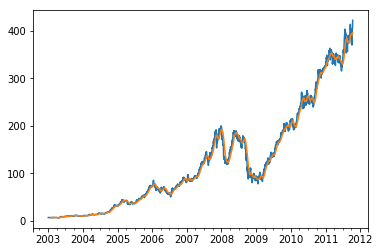

In [99]:
import matplotlib.pyplot as plt
plt.figure()
stock_px.AAPL.plot()
stock_move=stock_px.AAPL.rolling(20).mean()
stock_move.plot()

In [100]:
stock_move.head(25)

2003-01-02       NaN
2003-01-03       NaN
2003-01-06       NaN
2003-01-07       NaN
2003-01-08       NaN
2003-01-09       NaN
2003-01-10       NaN
2003-01-13       NaN
2003-01-14       NaN
2003-01-15       NaN
2003-01-16       NaN
2003-01-17       NaN
2003-01-20       NaN
2003-01-21       NaN
2003-01-22       NaN
2003-01-23       NaN
2003-01-24       NaN
2003-01-27       NaN
2003-01-28       NaN
2003-01-29    7.2365
2003-01-30    7.2245
2003-01-31    7.2110
2003-02-03    7.2050
2003-02-04    7.1985
2003-02-05    7.1955
Freq: B, Name: AAPL, dtype: float64

默认情况下，rolling函数需要窗口中所有的值为非NA值。可以修改该行为以解决缺失数据的问题。其实，在时间序列开始处尚不足窗口期的那些数据就是个特例

In [107]:
stock_move250=stock_px.AAPL.rolling(250,min_periods=5).mean()
stock_move250[0:10]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08    7.402000
2003-01-09    7.391667
2003-01-10    7.387143
2003-01-13    7.378750
2003-01-14    7.370000
2003-01-15    7.355000
Freq: B, Name: AAPL, dtype: float64

要计算扩展窗口平均（expanding window mean），可以使用expanding而不是rolling。“扩展”意味着，从时间序列的起始处开始窗口，增加窗口直到它超过所有的序列。

In [109]:
expanding_mean=stock_move250.expanding().mean()
expanding_mean.head(10)

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08    7.402000
2003-01-09    7.396833
2003-01-10    7.393603
2003-01-13    7.389890
2003-01-14    7.385912
2003-01-15    7.380760
Freq: B, Name: AAPL, dtype: float64